# Hello
I would like to present my very first data science project. Please do not be intimidated by its magnificence.
This is a simple food recommendation project. It gives ideas of dishes basing on your favourite food.
This is first project version, which works on a "dead" dataset. In other version the project will base on API and connect with website to search for recipes.

## Libraries and knowledge

In [343]:
import os
import numpy as np # linear algebra and arrays
import pandas as pd # dataframes and stuff
import matplotlib.pyplot as plt # plots
%matplotlib inline
import seaborn as sns # more plots
import statistics as st # distributions
import scipy as sp # pivot engineering

#ML model
from sklearn.metrics.pairwise import cosine_similarity

## Data import and first glimpse into it

### Users
u - UserID
techniques - Cooking techniques encountered by user
items - Recipes interacted with, in order
n_items - Number of recipes reviewed
ratings - Ratings given to each recipe encountered by this user
n_ratings - Number of ratings in total

In [344]:
users_pp = pd.read_csv('archive/PP_users.csv')
users_pp.info()
users_pp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25076 entries, 0 to 25075
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   u           25076 non-null  int64 
 1   techniques  25076 non-null  object
 2   items       25076 non-null  object
 3   n_items     25076 non-null  int64 
 4   ratings     25076 non-null  object
 5   n_ratings   25076 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


### Recipes - preprocessed data
id - Recipe ID
i - Recipe ID mapped to contiguous integers from 0
name_tokens - BPE-tokenized recipe name
ingredient_tokens - BPE-tokenized ingredients list (list of lists)
steps_tokens - BPE-tokenized steps
techniques - List of techniques used in recipe
calorie_level - Calorie level in ascending order
ingredients_ids - IDs of ingredients in recipe

In [345]:
recipes_pp = pd.read_csv('archive/PP_recipes.csv')
recipes_pp.info()
recipes_pp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178265 entries, 0 to 178264
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 178265 non-null  int64 
 1   i                  178265 non-null  int64 
 2   name_tokens        178265 non-null  object
 3   ingredient_tokens  178265 non-null  object
 4   steps_tokens       178265 non-null  object
 5   techniques         178265 non-null  object
 6   calorie_level      178265 non-null  int64 
 7   ingredient_ids     178265 non-null  object
dtypes: int64(3), object(5)
memory usage: 10.9+ MB


,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


### Recipes - raw data
name - Recipe name
id - Recipe ID
minutes - Minutes to prepare recipe
contributor_id - User ID who submitted this recipe
submitted - Date recipe was submitted
tags - Food.com tags for recipe
nutrition - Nutrition information (calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat
steps - Text for recipe steps, in order
description - User-provided description

In [346]:
recipes_raw = pd.read_csv('archive/RAW_recipes.csv')
recipes_raw.info()
recipes_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


### Interactions
user_id - User ID
recipe_id - Recipe ID
date - Date of interaction
rating - Rating given
review - Review text

In [347]:
interactions_raw = pd.read_csv('archive/RAW_interactions.csv')
interactions_raw.dropna()
interactions_raw.info()
interactions_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


## Data analysis

### Most often rated recipes

I am gonna do it using lists, where list indexes will be recipe ids. This requires creating lists longer by one than maximum recipe_id, so that recipe_id can directly match list index.
Having it done I will create a structured array as in formula:
[(recipe_id, interactions_count, average_rating), ...]

In [348]:
# Create a DataFrame to combine recipe id, its name, number of interactions and average rating

# Count interactions
interactions_count_ser = interactions_raw.value_counts('recipe_id')
interactions_count_ser.name = 'interactions_count'

# Calculate average rate, change column name and extend the DataFrame
avg_ratings_df = interactions_raw[['recipe_id', 'rating']].groupby('recipe_id').mean()
avg_ratings_df.rename(columns = {'rating': 'avg_rating'}, inplace = True)
recipes_ratings_df = avg_ratings_df.join(interactions_count_ser, on = 'recipe_id')

# Add recipes names
recipes_names = pd.DataFrame(data = recipes_raw[['id', 'name']])
recipes_names.set_index('id', inplace = True)
recipes_ratings_df = recipes_ratings_df.merge(recipes_names, left_on = 'recipe_id', right_index = True)

# Change columns order
recipes_ratings_df = recipes_ratings_df[['name', 'interactions_count', 'avg_rating']]

To print list of some top recipes I will define a function for it, so that it can be used multiple times. Additionally, I am defining a function that will show statistical data of the DataFrame.

In [349]:
# Define function listing a couple of top recipes
def print_top_recipes(df, column = 'interactions_count', recipes_shown = 10):

    """
    Find and print top recipes sorted by given column.
    Works for DataFrames with column names: 'name', 'interactions_count', 'avg_rating'
    :param df: DataFrame to be inspected
    :param column: column name to sort by, default - 'interactions_count'
    :param recipes_shown: int - number of recipes to be shown, default - 10
    :return: None
    """

    if not {'avg_rating', 'interactions_count', 'name'}.issubset(df.columns):
        raise ValueError('Invalid DataFrame columns! Columns that must appear: \'avg_rating\', \'interactions_count\', \'name\'.')

    df.sort_values(by = column, ascending = False, inplace = True)
    for i in range(recipes_shown, 0, -1):
        top_rated_recipe_name = df.iloc[i - 1]['name'].upper()
        top_rated_recipe_interactions = df.iloc[i - 1]['interactions_count']
        top_rated_recipe_rating = df.iloc[i - 1]['avg_rating']
        print(f'Position {i}: \n{top_rated_recipe_name}')
        print(f'Interactions: {top_rated_recipe_interactions}')
        print(f'Average rating: {top_rated_recipe_rating:1.2f} / 5')
        print()

# Define function showing statistical data
def print_interactions_number_stats(df):

    """
    Print number of recipe interactions statistical values.
    Works for DataFrames with column 'interactions_count'
    :param df: DataFrame to be inspected
    :param column: column name to sort by, default - 'interactions_count'
    :param recipes_shown: int - number of recipes to be shown, default - 10
    :return: None
    """

    if not {'interactions_count'}.issubset(df.columns):
        raise ValueError('Invalid DataFrame columns! Columns that must appear: \'avg_rating\', \'interactions_count\', \'name\'.')

    data = df['interactions_count']
    print('Number of recipes:', len(data))
    print('Median:    ', st.median(data))
    print('Quantiles: ', st.quantiles(data, n = 10))
    print('Mean value:', st.mean(data))

Now we can find our desired most popular recipes.

In [350]:
# Find 10 most often rated recipes
print_top_recipes(recipes_ratings_df)

Position 10: 
JAPANESE MUM S CHICKEN
Interactions: 904
Average rating: 4.40 / 5

Position 9: 
KITTENCAL S ITALIAN MELT IN YOUR MOUTH MEATBALLS
Interactions: 997
Average rating: 4.71 / 5

Position 8: 
WHATEVER FLOATS YOUR BOAT  BROWNIES
Interactions: 1220
Average rating: 4.53 / 5

Position 7: 
JO MAMA S WORLD FAMOUS SPAGHETTI
Interactions: 1234
Average rating: 4.42 / 5

Position 6: 
YES  VIRGINIA THERE IS A GREAT MEATLOAF
Interactions: 1305
Average rating: 4.21 / 5

Position 5: 
BEST EVER BANANA CAKE WITH CREAM CHEESE FROSTING
Interactions: 1322
Average rating: 4.33 / 5

Position 4: 
CREAMY CAJUN CHICKEN PASTA
Interactions: 1448
Average rating: 4.54 / 5

Position 3: 
CROCK POT CHICKEN WITH BLACK BEANS   CREAM CHEESE
Interactions: 1579
Average rating: 4.22 / 5

Position 2: 
TO DIE FOR CROCK POT ROAST
Interactions: 1601
Average rating: 4.29 / 5

Position 1: 
BEST BANANA BREAD
Interactions: 1613
Average rating: 4.19 / 5



### Highest rated recipes
At this point I would like to find recipes with highest average rating, but this would probably return a lot of recipes with just one, 5-stars mark.

In [351]:
# Find 10 top-rated recipes

print_top_recipes(recipes_ratings_df, column = 'avg_rating')

Position 10: 
BANGKOK BURGERS
Interactions: 1
Average rating: 5.00 / 5

Position 9: 
HOMEMADE ZAHTAR
Interactions: 3
Average rating: 5.00 / 5

Position 8: 
STILTON AND POTATO SOUP WITH CHEESE CROUTONS
Interactions: 3
Average rating: 5.00 / 5

Position 7: 
CHICKEN BREASTS GLAZED WITH HOT PEPPER JELLY
Interactions: 3
Average rating: 5.00 / 5

Position 6: 
CHEESE AND CRACKER MEAT LOAF
Interactions: 1
Average rating: 5.00 / 5

Position 5: 
KIWI CHICKEN TOSTADAS
Interactions: 1
Average rating: 5.00 / 5

Position 4: 
SPINACH AND CHICKPEA CURRY
Interactions: 1
Average rating: 5.00 / 5

Position 3: 
TURKEY PICCATA
Interactions: 1
Average rating: 5.00 / 5

Position 2: 
BEEFSTEAK AND MUSHROOM PIE
Interactions: 1
Average rating: 5.00 / 5

Position 1: 
MINI BUFFALO CHICKEN CHEESESTEAKS
Interactions: 1
Average rating: 5.00 / 5



We got exactly the expected result. So let's make the results more objective and let's set a threshold below which we will not consider results as valid. This could be some constant value (e.g. 20 or 50 ratings), but we want it to be prone to overall ratings number distribution. So let's check what does this distribution look like.

Text(0.5, 0, 'Number of interactions (logarithmic scale)')

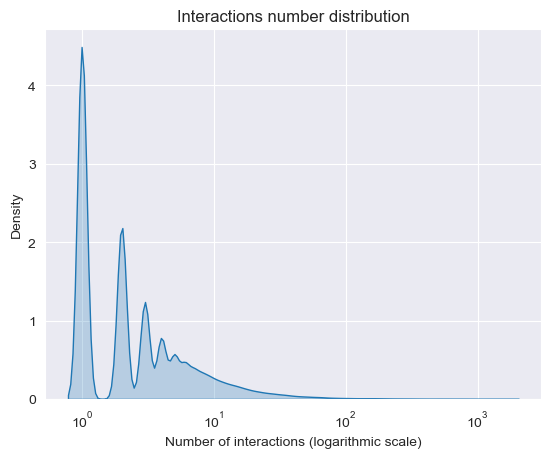

In [352]:
# Create distribution plot

sns.kdeplot(data = recipes_ratings_df['interactions_count'], log_scale = True, fill = True, cbar = True)
plt.title('Interactions number distribution')
plt.xlabel('Number of interactions (logarithmic scale)')

In [353]:
# Print some statistical values

print_interactions_number_stats(recipes_ratings_df)

Number of recipes: 231637
Median:     2
Quantiles:  [1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 5.0, 9.0]
Mean value: 4.888541122532238


After having a look at the chart above and statistical data I decided to set the first threshold as >= 10 interactions, which will cut off majority of lowest popular recipes.

In [354]:
# Create DataFrame with recipes that have minimum 10 interactions

top_rated_recipes_min_interactions = 10
recipes_ratings_df_top_list = recipes_ratings_df[recipes_ratings_df['interactions_count'].ge(top_rated_recipes_min_interactions)]
print_top_recipes(recipes_ratings_df_top_list, column = 'avg_rating')

Position 10: 
GARLICKY CLAM DIP
Interactions: 10
Average rating: 5.00 / 5

Position 9: 
WW POTATO GRATIN 5 POINTS
Interactions: 10
Average rating: 5.00 / 5

Position 8: 
ROAST PORK PUERTORICANO
Interactions: 10
Average rating: 5.00 / 5

Position 7: 
BEAUTIFUL BETH  DRINK
Interactions: 10
Average rating: 5.00 / 5

Position 6: 
MARINADE FOR LAMB CHOPS   OR ANY OTHER MEAT
Interactions: 10
Average rating: 5.00 / 5

Position 5: 
FARMHOUSE POTATO CHEESE SOUP
Interactions: 10
Average rating: 5.00 / 5

Position 4: 
HAWAIIAN PINEAPPLE ICED TEA
Interactions: 10
Average rating: 5.00 / 5

Position 3: 
SHRIMP LUNCHEON SANDWICHES   PRETTY AND PINK
Interactions: 10
Average rating: 5.00 / 5

Position 2: 
BEEF BOLOGNESE   DELISH
Interactions: 10
Average rating: 5.00 / 5

Position 1: 
BEER BRATS WITH ONIONS AND PEPPERS
Interactions: 13
Average rating: 5.00 / 5



C:\Users\lenka\AppData\Local\Temp\ipykernel_1668\902751602.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = column, ascending = False, inplace = True)


As we can see, setting minimum interactions count to just 10 interactions let us filter 90% of recipes, but - sorry for that - we still got only 5-star results. Let's check the distribution and statistical data now:

Text(0.5, 0, 'Number of interactions (logarithmic scale)')

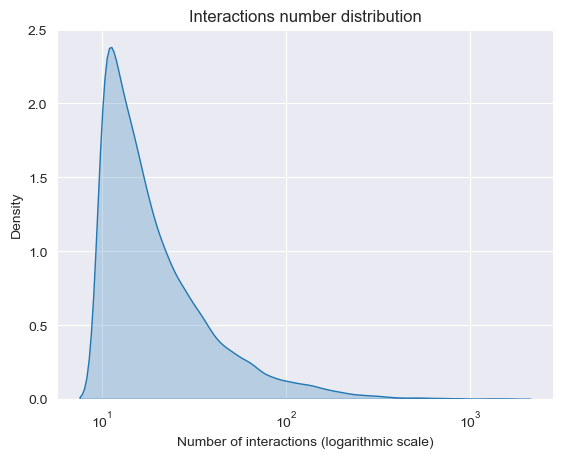

In [355]:
# Create - again - distribution plot

sns.kdeplot(data = recipes_ratings_df_top_list['interactions_count'], log_scale = True, fill = True, cbar = True)
plt.title('Interactions number distribution')
plt.xlabel('Number of interactions (logarithmic scale)')

In [356]:
# Print - again - some statistical values

print_interactions_number_stats(recipes_ratings_df_top_list)

Number of recipes: 21399
Median:     16
Quantiles:  [10.0, 11.0, 12.0, 14.0, 16.0, 19.0, 23.0, 31.0, 50.0]
Mean value: 28.235431562222534


Let's filter it once again and check how it looks for at least 100 interactions:

In [357]:
# Create DataFrame with recipes that have minimum 100 interactions

top_rated_recipes_min_interactions = 100
recipes_ratings_df_top_list = recipes_ratings_df[recipes_ratings_df['interactions_count'].ge(top_rated_recipes_min_interactions)]
print_top_recipes(recipes_ratings_df_top_list, column = 'avg_rating')

Position 10: 
WHITE FISH IN HERBED BUTTER
Interactions: 100
Average rating: 4.82 / 5

Position 9: 
EASY  FESTIVE CHOCOLATE HOLIDAY PRETZELS
Interactions: 122
Average rating: 4.84 / 5

Position 8: 
CROUTONS
Interactions: 100
Average rating: 4.84 / 5

Position 7: 
INDIVIDUAL CREAM CHEESE DANISH
Interactions: 135
Average rating: 4.84 / 5

Position 6: 
SPICED SWEET ROASTED RED PEPPER   FETA HUMMUS
Interactions: 117
Average rating: 4.85 / 5

Position 5: 
LINDA S CHEESECAKE STUFFED STRAWBERRIES
Interactions: 131
Average rating: 4.85 / 5

Position 4: 
SWEET  CREAMY COLESLAW
Interactions: 139
Average rating: 4.85 / 5

Position 3: 
MONTEREY CHICKEN ROLLS
Interactions: 134
Average rating: 4.87 / 5

Position 2: 
BROWN SUGAR BUNDT CAKE
Interactions: 118
Average rating: 4.92 / 5

Position 1: 
MEXICAN STACK UP  RSC
Interactions: 217
Average rating: 4.99 / 5



C:\Users\lenka\AppData\Local\Temp\ipykernel_1668\902751602.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = column, ascending = False, inplace = True)


Now we got a really nice top recipes list, which means we can head to the supermarket for some tex-mex ingredients :)

## Recommendation tools

### Creating DataFrame for pivot table

We will have to limit size of the table, because it would get too big to be processed by Pandas. To do so we will delete users with only one interaction and recipes also with only one interaction.

In [358]:
# Limit sets of recipes and users

min_recipe_interactions = 10
recipes_valid = interactions_raw['recipe_id'].value_counts()
recipes_valid = recipes_valid[recipes_valid.ge(min_recipe_interactions)]
interactions_valid = interactions_raw[interactions_raw['recipe_id'].isin(recipes_valid.index)]

min_user_interactions = 3
users_valid = interactions_raw['user_id'].value_counts()
users_valid = users_valid[users_valid.ge(min_user_interactions)]
interactions_valid = interactions_valid[interactions_valid['user_id'].isin(users_valid.index)]


In [359]:
# Create a new DataFrame combining user id, recipe name and its rating

rated_recipes = interactions_valid.merge(recipes_raw, left_on = 'recipe_id', right_on = 'id')
rated_recipes = rated_recipes[['user_id', 'name', 'rating']]
print(len(rated_recipes))
rated_recipes.head()

473751


,user_id,name,rating
0,56680,potato crab chowder,5
1,183565,potato crab chowder,5
2,101823,potato crab chowder,5
3,349752,potato crab chowder,5
4,446143,potato crab chowder,4


In [360]:
# Create pivot table to gather users and their ratings in one table

pivot = pd.pivot_table(rated_recipes, values = 'rating', index = 'user_id', columns = 'name')
pivot.head()

name,1 00 tangy chicken recipe,1 1 1 tempura batter,1 2 3 4 tater tot casserole,1 2 3 4 cake,1 2 3 4 cake with caramel icing,1 2 3 apple crisp,1 2 3 black bean salsa dip,1 cup of coffee pork roast,1 hour ham and bean soup,1 minute cake,...,zucchini spoon bread,zucchini squash rice casserole,zucchini stuffing,zucchini tart with gruyere cheese and herbs,zucchini they will eat,zucchini with summer herbs,zucotte,zuppa di pesce cioppino or fish stew,zuppa toscana soup olive garden clone,zurie s overnight no knead bread
user_id,,,,,,,,,,,,,,,,,,,,,
1533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Engineering pivot table

We will do it in following steps:
1. Value normalization
2. Filling NaN values with 0
3. Transposing the pivot for the next step
4. Dropping columns with values of 0
5. Using scipy package to convert to sparse matrix format for the similarity computation


In [361]:
# Step 1
pivot_n = pivot.apply(lambda x: (x - np.mean(x)) / (np. max(x) - np.min(x)), axis = 1)
# Step 2
pivot_n.fillna(0, inplace = True)
# Step 3
pivot_n = pivot_n.T
# Step 4
pivot_n = pivot_n.loc[:, (pivot_n != 0).any(axis = 0)]
# Step 5
pivot_sparse = sp.sparse.csr_matrix(pivot_n.values)

## Cosine similarity model

This method measures similarity of two vectors by calculating angle between them.

In [362]:
# Model based on recipe similarity
recipe_similarity = cosine_similarity(pivot_sparse)

# DataFrame of recipes similarity
recipe_similarity_df = pd.DataFrame(recipe_similarity, index = pivot_n.index, columns = pivot_n.index)

In [363]:
def recommend_recipe(liked_recipe):
    recipe_similarity_df.sort_values(by = liked_recipe, ascending = False, inplace = True)
    print('Recommmended, because you liked:', liked_recipe)
    for number in range(1, 6):
        recommended_recipe = recipe_similarity_df.index[number]
        match = float(recipe_similarity_df.iloc[number][liked_recipe]) * 100
        print(f'Top {number}: {recommended_recipe}, match: {match:2.2f} %')

To properly use our recommendation method an exact base recipe name must be given as an argument. So let's prepare an easy searching tool that finds recipes names that contain given phrase. Then, let's check results of the final project!

In [429]:
def find_recipe(name, max_recipes_shown = 20):
    # Search for recipes which names contain searched phrase. Use only recipes available in similarity model.
    found_recipes_df_index = recipe_similarity_df[recipe_similarity_df.index.str.contains(name)]
    # Create a DataFrame from recipes_ratings_df containing only found recipes
    found_recipes_df = recipes_ratings_df[recipes_ratings_df['name'].isin(found_recipes_df_index.index)]
    # Sort DataFrame
    found_recipes_df.sort_values(by = 'interactions_count', ascending = False, inplace = True)

    if max_recipes_shown > len(found_recipes_df):
        max_recipes_shown = len(found_recipes_df)

    # Print found recipes
    print(f'{len(found_recipes_df)} recipes found. Top {max_recipes_shown} of them:\n')

    for i in range(0, max_recipes_shown):
        found_recipe_interactions = found_recipes_df.iloc[i]['interactions_count']
        found_recipe_rating = found_recipes_df.iloc[i]['avg_rating']
        print(found_recipes_df.iloc[i]['name'])
        print(f'  Rated by {found_recipe_interactions} users. Average rate {found_recipe_rating: 1.2f} / 5')
        print()

In [431]:
find_recipe('japanese', 10)

40 recipes found. Top 10 of them:

japanese mum s chicken
  Rated by 904 users. Average rate  4.40 / 5

benihana japanese fried rice
  Rated by 80 users. Average rate  4.55 / 5

japanese cheesecake
  Rated by 63 users. Average rate  4.49 / 5

niku jaga  japanese beef stew in the crock pot
  Rated by 52 users. Average rate  4.35 / 5

japanese steakhouse ginger salad dressing copycat shogun steak
  Rated by 42 users. Average rate  4.07 / 5

mom s yakisoba japanese fried noodles
  Rated by 32 users. Average rate  3.94 / 5

japanese vinegared cucumbers
  Rated by 29 users. Average rate  4.55 / 5

japanese curry  wafuu
  Rated by 28 users. Average rate  4.75 / 5

grilled japanese swordfish
  Rated by 26 users. Average rate  4.69 / 5

japanese chicken drumettes
  Rated by 24 users. Average rate  4.75 / 5



C:\Users\lenka\AppData\Local\Temp\ipykernel_1668\2887299145.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  found_recipes_df.sort_values(by = 'interactions_count', ascending = False, inplace = True)


In [432]:
recommend_recipe('japanese cheesecake')

Recommmended, because you liked: japanese cheesecake
Top 1: virginia s easy lasagne, match: 39.68 %
Top 2: mean chef s french fries, match: 26.07 %
Top 3: cocoa honey cake, match: 25.98 %
Top 4: devonshire potato mushroom pie, match: 22.83 %
Top 5: tastes like apple pie apple squares, match: 12.60 %
